# Importing all dependencies

In [46]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## Reading Data from a CSV File from Kaggle

### Reference of Dataset: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [49]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Total Number of Entries in the DataFrame

In [50]:
df.shape

(200, 5)

Rows: 200; Columns: 5

#### Checking if the dataframe contains missing values

In [51]:
df.isnull().values.any()

False

## Relevant Preprocessing of Data
#### - Selecting only relevant columns
#### - Converting Categorical values to numeric values by One-Hot Encoding

In [53]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Selecting Numeric Columns because K-Means is not applicable to Categorical Values

### Applying Elbow Method to find optimum number of clusters for the dataset

In [54]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)


### For Plotting of K-values

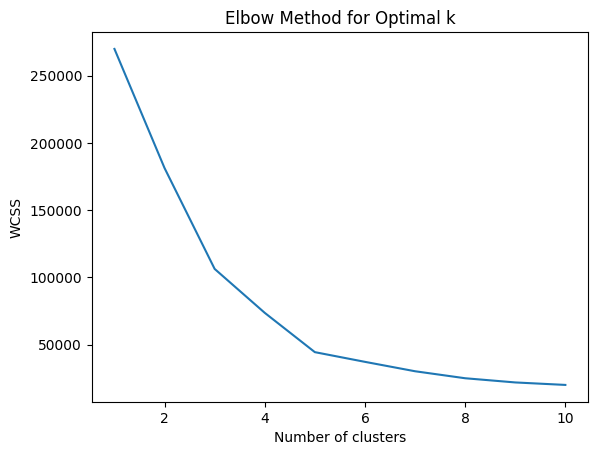

In [55]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Sum of squared distances to closest centroid
plt.title('Elbow Method for Optimal k')
plt.show()

#### Optimum Number of Clusteres = 5

## Training the K-Means Clustering Model:

In [56]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init = 10)
Y = kmeans.fit_predict(df1)
print(Y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [43]:
Y.shape

(3900,)

## Plotting of Cluster Values for each Entry in DataFrame

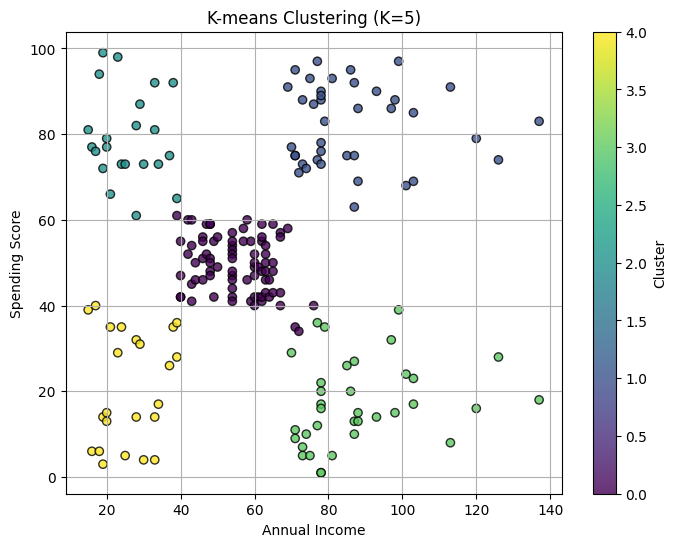

In [59]:
# Get the cluster labels
labels = kmeans.labels_

# Plot the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(df1['Annual Income (k$)'], df1['Spending Score (1-100)'], c=labels, cmap='viridis', edgecolors='k', alpha=0.8)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering (K=5)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()